# SuPy UHI testing January 26 2021

In [1]:
import matplotlib.pyplot as plt
import supy as sp
import pandas as pd
import numpy as np
from pathlib import Path
from night import night 
from dict_legend import *
from supy_plot import supy_plot
get_ipython().run_line_magic('matplotlib', 'inline')
# get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'svg'")
sp.show_version()

SuPy versions
-------------
supy: 2021.1.12 
supy_driver: 2020b10

SYSTEM DEPENDENCY

INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.0.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.18362
machine          : AMD64
processor        : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.1.5
numpy            : 1.19.5
pytz             : 2020.5
dateutil         : 2.8.1
pip              : 20.3.3
setuptools       : 51.1.2
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.3.3
html5lib         : None
pymysql          : None
psycopg2         : 2.8.4 (dt dec pq3 ext lo64)
jinja2           : 2.11.1
IPython      

In [2]:
# Sample Data
path_runcontrol_s = Path('SuPy/src/supy/sample_run')/ 'RunControl.nml'
df_state_init_s = sp.init_supy("C:\Script\SuPy\src\supy\sample_run\Input\Output\df_state.csv")
grid_s = df_state_init_s.reset_index().set_index('grid')[1::].index[0]
df_forcing_s = sp.load_forcing_grid(path_runcontrol_s, grid_s)


# Wisley Data
path_runcontrol_w = Path('SuPy/src/supy/sample_run')/ 'RunControl_wisley.nml'
df_state_init_w = sp.init_supy("C:\Script\SuPy\src\supy\sample_run\Input_wisley\Output\df_state.csv")
grid_w = df_state_init_w.reset_index().set_index('grid')[1::].index[0]
df_forcing_w = sp.load_forcing_grid(path_runcontrol_w, grid_w)

# Wisley Data
path_runcontrol_wu = Path('SuPy/src/supy/sample_run')/ 'RunControl_wisley_urban.nml'
df_state_init_wu = sp.init_supy("C:\Script\SuPy\src\supy\sample_run\Input_wisley_urban\Output\df_state.csv")
grid_wu = df_state_init_wu.reset_index().set_index('grid')[1::].index[0]
df_forcing_wu = sp.load_forcing_grid(path_runcontrol_wu, grid_wu)

2021-01-26 13:40:49,420 - SuPy - INFO - All cache cleared.
2021-01-26 13:40:51,603 - SuPy - INFO - All cache cleared.
2021-01-26 13:40:53,737 - SuPy - INFO - All cache cleared.


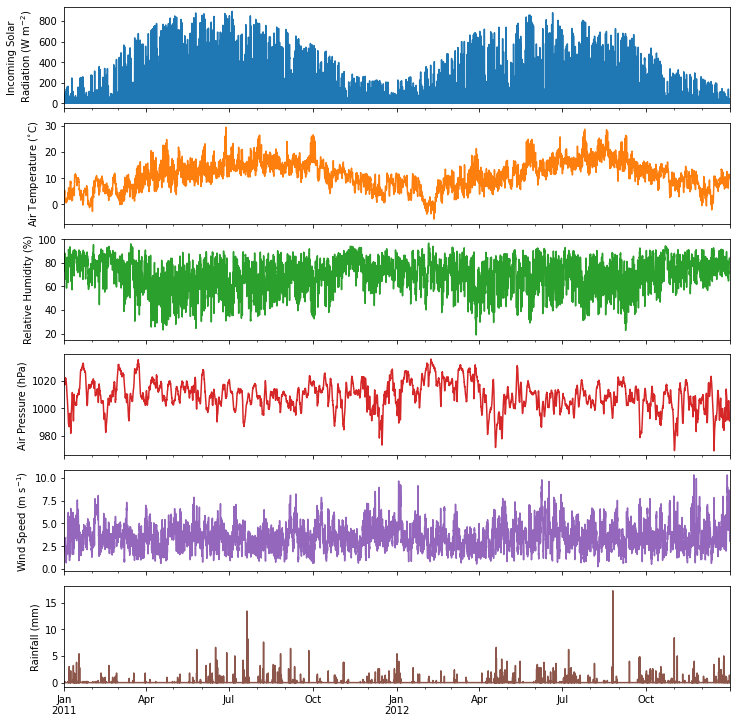

In [3]:
# %% Sample Data Metological Conditions

df_plot_forcing_x = df_forcing_s.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

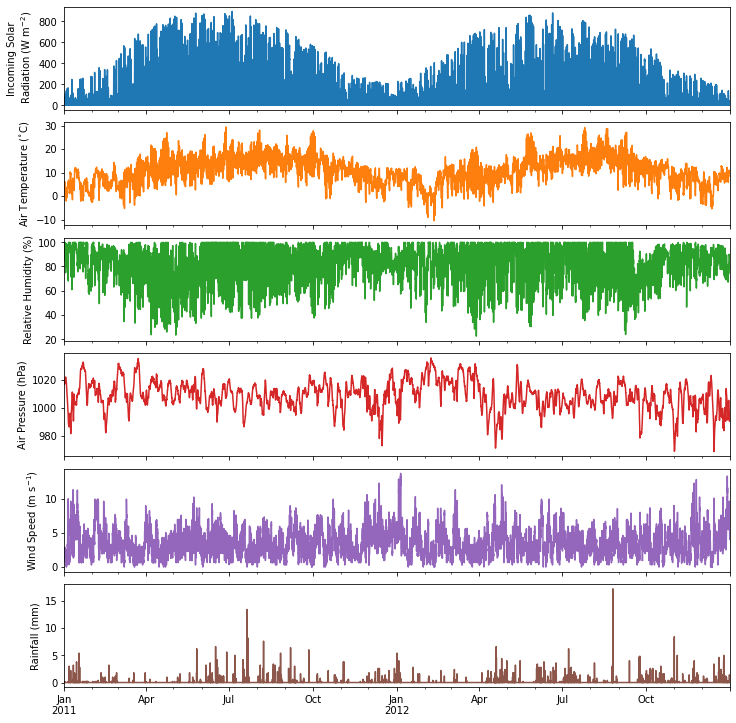

In [4]:
# %% Wisley Metological Conditions

df_plot_forcing_x = df_forcing_w.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

In [5]:
# %% Investigate Metreological conditions for London and Wisley
df_forcing_wi = df_forcing_w.add_suffix('_w')

df_forcing_m = pd.concat([df_forcing_s,df_forcing_wi], axis=1, join='inner')
df_forcing_m = df_forcing_m.rename(columns={'kdown': 'Kdown'})

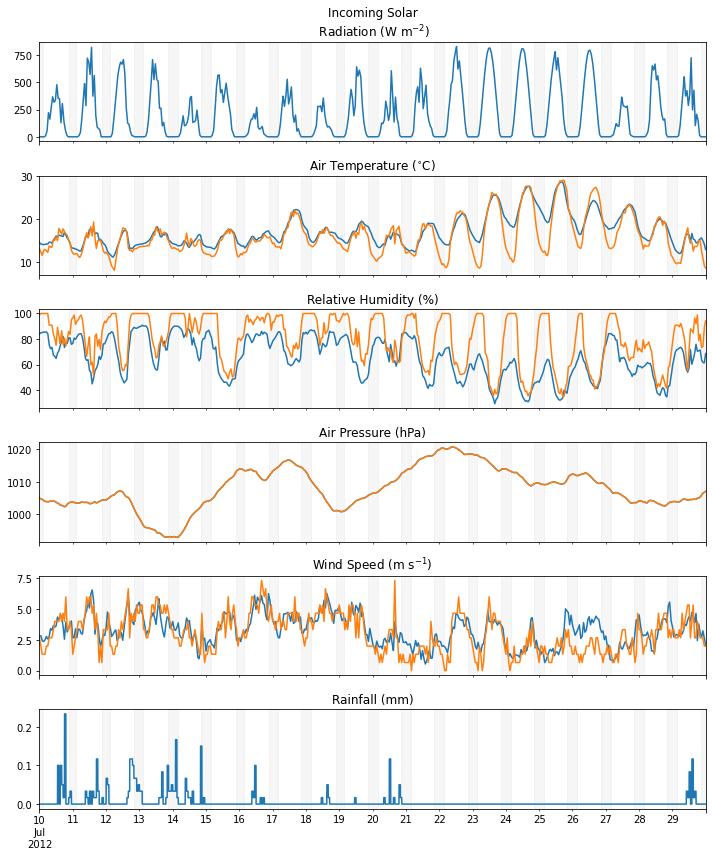

In [6]:
fsize=(10,12)
fig, axes = plt.subplots(6, 1, sharex=True)
s = '2012 07 10'
e = '2012 07 29'
a = df_forcing_m.loc[s : e ,['Kdown']].plot(ax=axes[0],figsize=fsize,title= 'Incoming Solar\n Radiation ($ \mathrm{W \ m^{-2}}$)')
b = df_forcing_m.loc[s : e ,['Tair','Tair_w']].plot(ax=axes[1],figsize=fsize,title='Air Temperature ($^{\circ}}$C)')
c = df_forcing_m.loc[s : e ,['RH','RH_w']].plot(ax=axes[2],figsize=fsize,title='Relative Humidity (%)')
d = df_forcing_m.loc[s : e ,['pres','pres_w']].plot(ax=axes[3],figsize=fsize,title='Air Pressure (hPa)')
e1= df_forcing_m.loc[s : e ,['U','U_w']].plot(ax=axes[4],figsize=fsize,title='Wind Speed (m $\mathrm{s^{-1}}$)')
f = df_forcing_m.loc[s : e ,['rain']].plot(ax=axes[5],figsize=fsize,title='Rainfall (mm)')
for var in [a,b,c,d,e1,f]:
    figsize=fsize
    night(var,df_forcing_m,s,e)
    var.get_legend().remove()
fig.tight_layout()

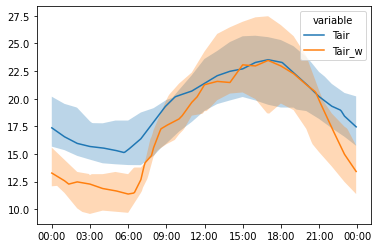

In [7]:
# %% June Tair Sample Data
s = '2012 07 21'
e = '2012 07 29'
ax = sp.util.plot_day_clm(df_forcing_m.loc[s:e,['Tair', 'Tair_w']])

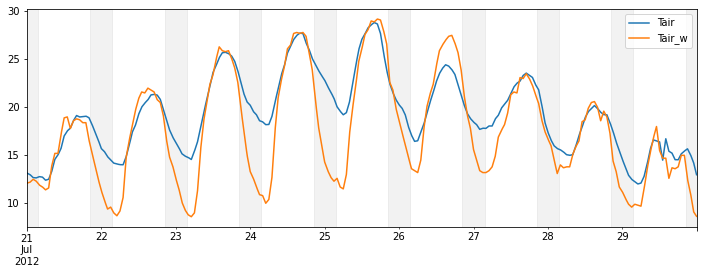

In [8]:
# %% June Tair Wisley Data 
ax_output = df_forcing_m.loc[s:e,['Tair','Tair_w']].plot(figsize=(12,4))
night(ax_output,df_forcing_m,s,e,s_alpha=0.1)

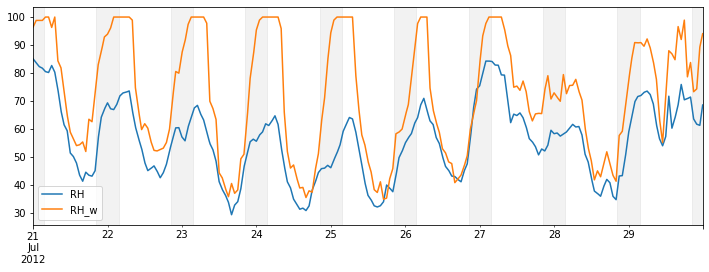

In [9]:
# %%  RH Selected days comparison
ax_output = df_forcing_m.loc[s:e,['RH','RH_w']].plot(figsize=(12,4))
night(ax_output,df_forcing_m,s,e,s_alpha=0.1)

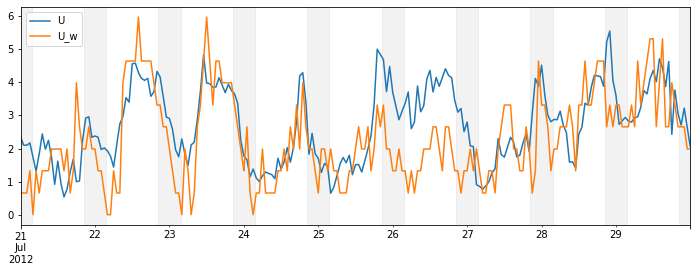

In [10]:
# %%  U Selected days comparison
ax_output = df_forcing_m.loc[s:e,['U','U_w']].plot(figsize=(12,4))
night(ax_output,df_forcing_m,s,e,s_alpha=0.1)

# Scenarios used 

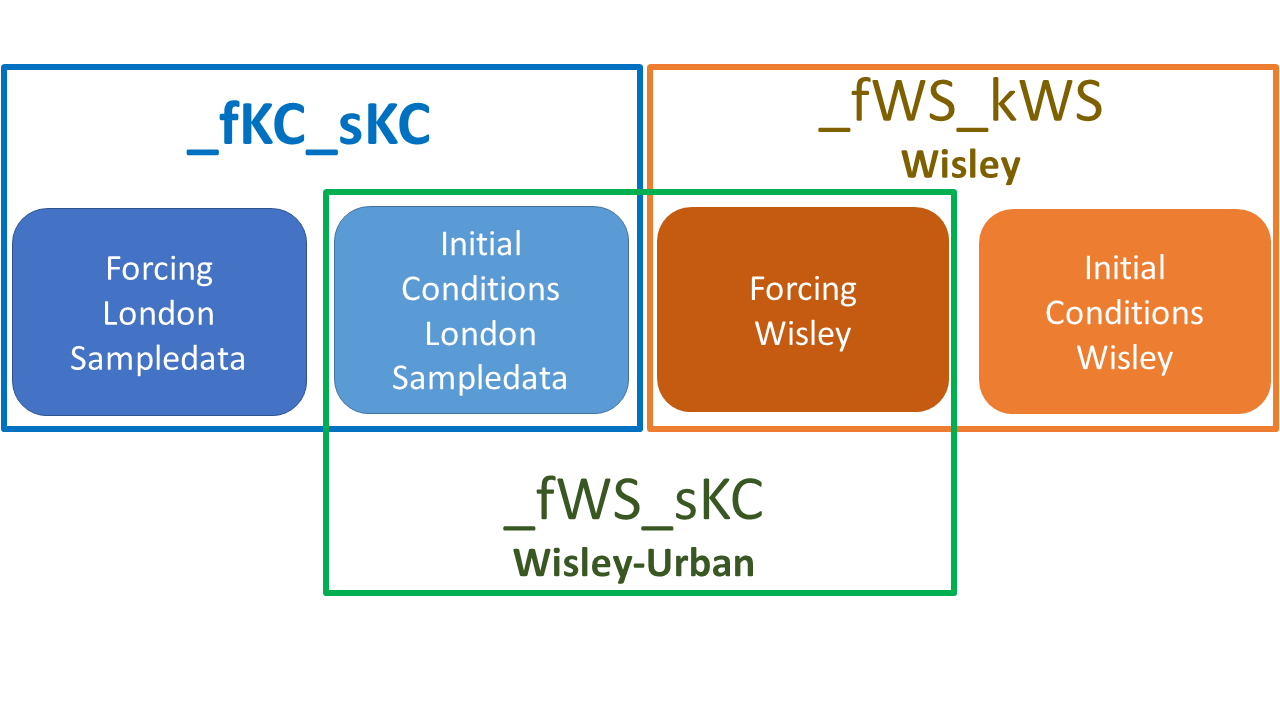

Wisley forcing data obtained from CEDA Archive

In [11]:
sp.check_state(df_state_init_s)
sp.check_state(df_state_init_w)
sp.check_state(df_state_init_wu)

2021-01-26 13:41:18,333 - SuPy - INFO - SuPy is validating `df_state`...
2021-01-26 13:41:18,502 - SuPy - INFO - All checks for `df_state` passed!
2021-01-26 13:41:18,502 - SuPy - INFO - SuPy is validating `df_state`...
2021-01-26 13:41:18,681 - SuPy - INFO - All checks for `df_state` passed!
2021-01-26 13:41:18,681 - SuPy - INFO - SuPy is validating `df_state`...
2021-01-26 13:41:18,850 - SuPy - INFO - All checks for `df_state` passed!


## Run SuPy

In [12]:

# Run SuPy Sample data conditions
df_output_s, df_state_final_s = sp.run_supy(df_forcing_s, df_state_init_s)
df_output_suews_s = df_output_s['SUEWS']

# Run SuPy with Whisley add _w for recognition later on
df_output_w, df_state_final_w = sp.run_supy(df_forcing_w, df_state_init_w)
df_output_suews_w = df_output_w['SUEWS']
df_output_suews_w = df_output_suews_w.add_suffix('_w')
# 
# Run SuPy with Whisley met data and Sample data initial conditions add _wu for recognition later on
df_output_wu, df_state_final_wu = sp.run_supy(df_forcing_wu, df_state_init_wu)
df_output_suews_wu = df_output_wu['SUEWS']
df_output_suews_wu = df_output_suews_wu.add_suffix('_wu')

2021-01-26 13:41:18,866 - SuPy - INFO - ====================
2021-01-26 13:41:18,866 - SuPy - INFO - Simulation period:
2021-01-26 13:41:18,866 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2021-01-26 13:41:18,866 - SuPy - INFO -   End: 2013-01-01 00:00:00
2021-01-26 13:41:18,866 - SuPy - INFO - 
2021-01-26 13:41:18,866 - SuPy - INFO - No. of grids: 1
2021-01-26 13:41:18,866 - SuPy - INFO - SuPy is running in serial mode
2021-01-26 13:42:17,746 - SuPy - INFO - Execution time: 58.9 s
2021-01-26 13:42:17,748 - SuPy - INFO - ====================

2021-01-26 13:42:17,748 - SuPy - INFO - ====================
2021-01-26 13:42:17,748 - SuPy - INFO - Simulation period:
2021-01-26 13:42:17,748 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2021-01-26 13:42:17,748 - SuPy - INFO -   End: 2013-01-01 00:00:00
2021-01-26 13:42:17,748 - SuPy - INFO - 
2021-01-26 13:42:17,748 - SuPy - INFO - No. of grids: 1
2021-01-26 13:42:17,748 - SuPy - INFO - SuPy is running in serial mode
2021-01-26 13:44:32,053 - S

In [13]:
# Merge to one dataframe for easier plotting
df_output_suews_g_s  = df_output_suews_s.loc[grid_s]
df_output_suews_g_w  = df_output_suews_w.loc[grid_w]
df_output_suews_g_wu = df_output_suews_wu.loc[grid_wu]

df_merge = pd.concat([df_output_suews_g_s, df_output_suews_g_w,df_output_suews_g_wu],axis=1,join='inner')


# Add possibilites for investigating differences
init_col = list(df_output_suews_s)
w_col = list(df_output_suews_w)
wu_col = list(df_output_suews_wu)

for i, wd, w, wud, wu in zip(init_col,[sub + '_d' for sub in w_col],w_col,[sub + '_d' for sub in wu_col],wu_col):
    df_merge[wd] = df_merge[w] - df_merge[i]
    df_merge[wud] = df_merge[wu] - df_merge[i]

# Comparison of Fluxes 
 All diffrences are done in comparison to the Sample Data Set
 
 22th - 29th of June 2012 is used as time of comparison

In [14]:
# Start and end date for comparison
s = '2012 07 22'
e = '2012 07 29'

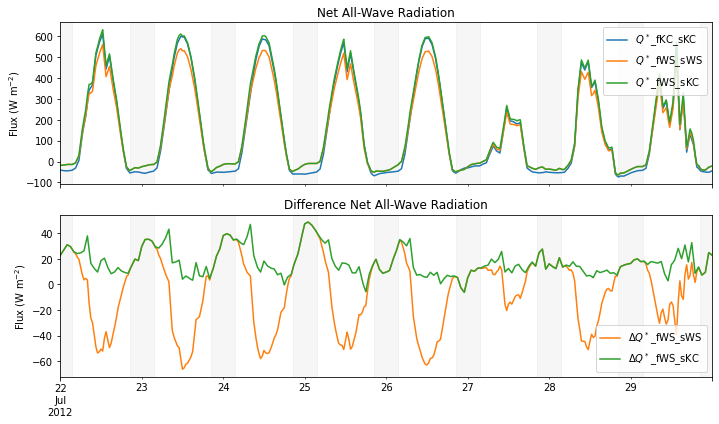

In [15]:
# %% Net All Wave Radiation
var = 'QN'
supy_plot(var, df_merge,s,e,size=(10,6))

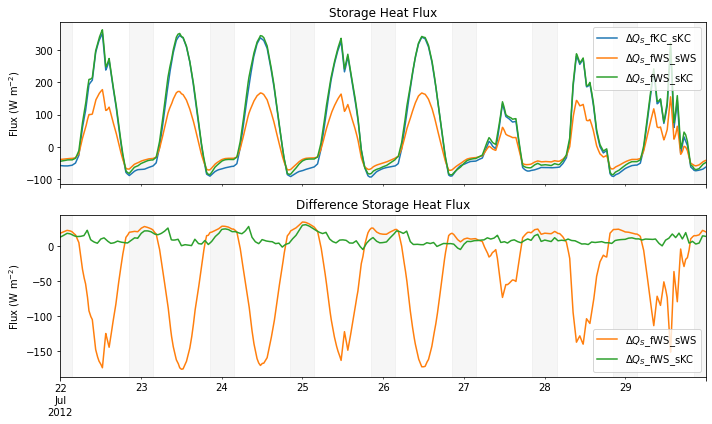

In [16]:
# %% Storage Heat Flux
var = 'QS'
supy_plot(var, df_merge,s,e)

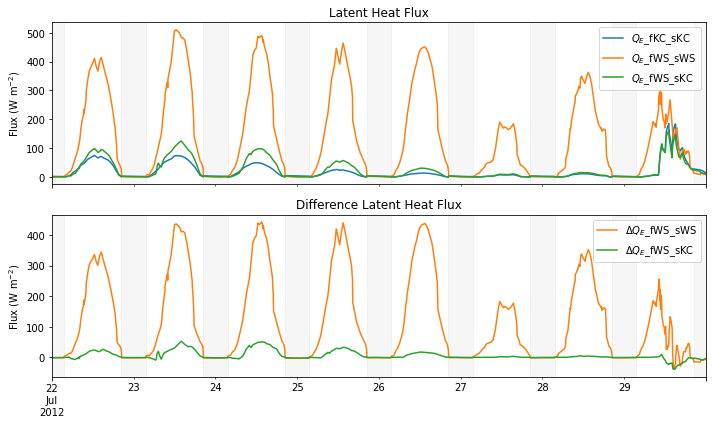

In [17]:
# Latent Heat Flux
var = 'QE'
supy_plot(var, df_merge,s,e,size=(10,6))

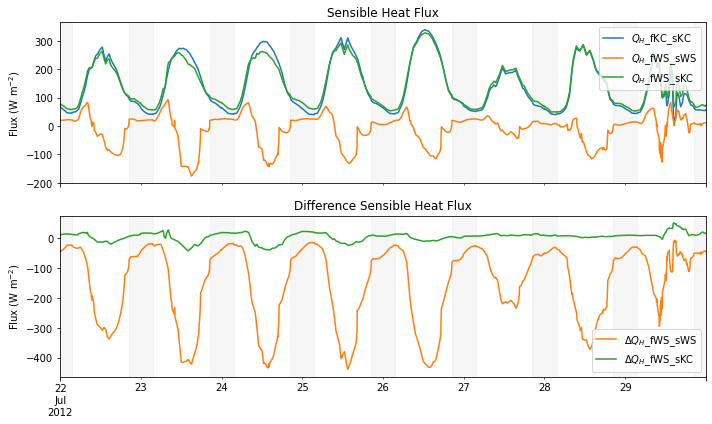

In [18]:
# Sensible Heat Flux
var = 'QH'
supy_plot(var, df_merge,s,e)

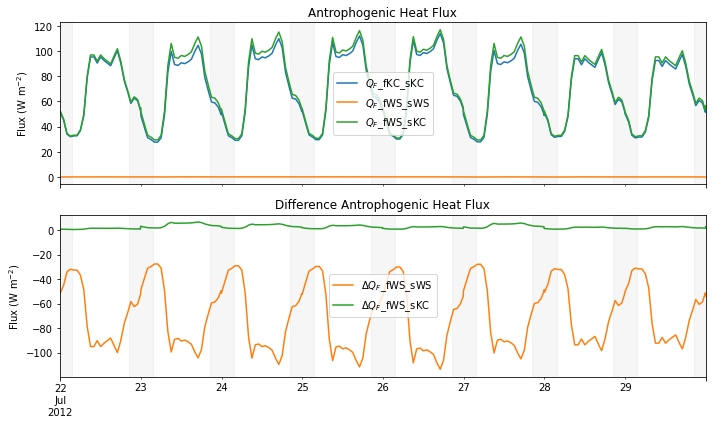

In [19]:
# %%% Anthropogenic Heat flux
supy_plot('QF', df_merge,s,e)

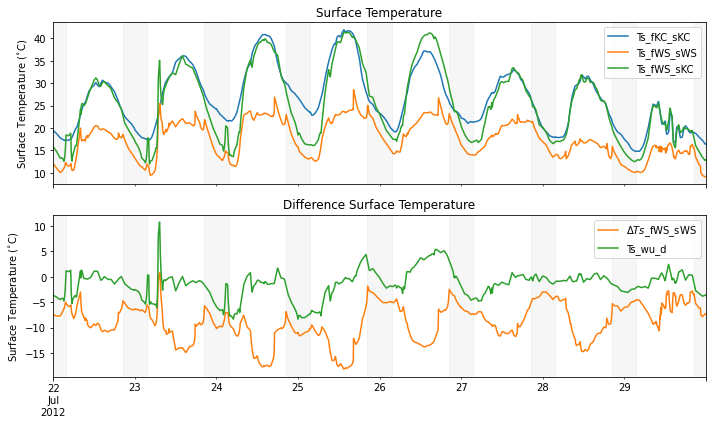

In [20]:


supy_plot('Ts', df_merge,s,e)

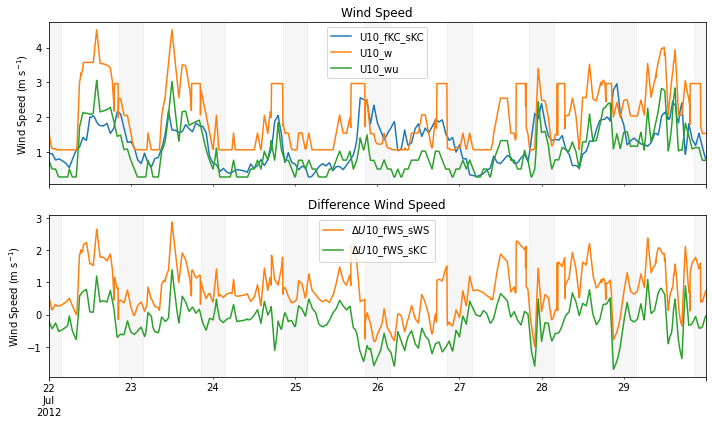

In [21]:
# %% Wind Speed 10m
supy_plot('U10', df_merge,s,e)

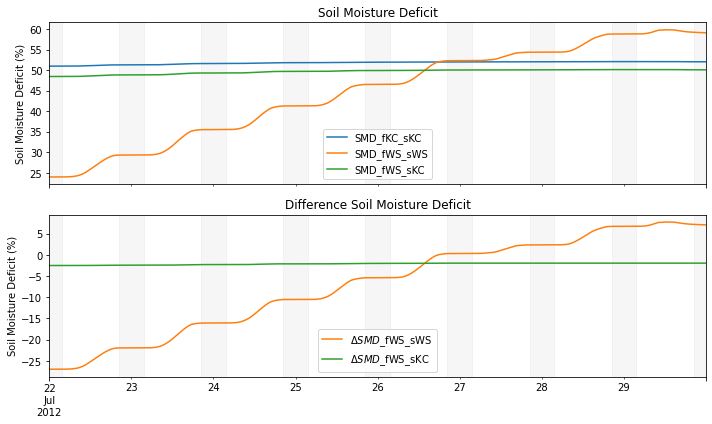

In [22]:
# %% Soil Moisture Deficit
supy_plot('SMD', df_merge,s,e)

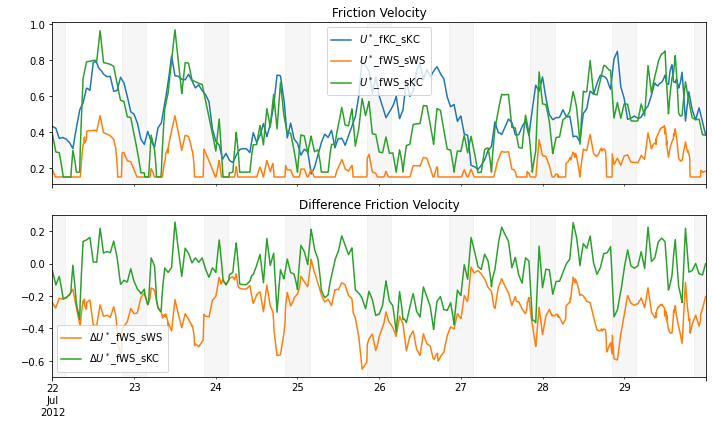

In [23]:
supy_plot('UStar', df_merge,s,e)

## large QE at Wisley: why?

In [24]:
df_output_merge_x=pd.concat([df_output_s, df_output_w,df_output_wu],axis=1,join='inner',keys=['fKC_sKC','fWS_sWS','fWS_sKC']).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1)

In [25]:
# convenience method to modify column names
def drop_prefix(self, prefix):
    self.columns = self.columns.str.lstrip(prefix)
    return self

def drop_suffix(self, suffix):
    self.columns = self.columns.str.rstrip(suffix)
    return self

pd.core.frame.DataFrame.drop_prefix = drop_prefix
pd.core.frame.DataFrame.drop_suffix = drop_suffix

df_forcing_merge_x=pd.concat([df_forcing_s, df_forcing_w,df_forcing_wu],axis=1,join='inner',keys=['fKC_sKC','fWS_sWS','fWS_sKC']).swaplevel(0,1,axis=1).sort_index(axis=1)

df_state_merge_x=pd.concat([df_state_init_s, df_state_init_w,df_state_init_wu],axis=1,join='inner',keys=['fKC_sKC','fWS_sWS','fWS_sKC']).swaplevel(0,1,axis=1).sort_index(axis=1)

df_output_merge_x=df_output_merge_x=pd.concat([df_output_s, df_output_w,df_output_wu],axis=1,join='inner',keys=['fKC_sKC','fWS_sWS','fWS_sKC']).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1).loc[grid_s]



df_merge_x=df_output_merge_x.SUEWS

# add available energy, AE
df_merge_x=df_merge_x.stack().eval('AE=QN+QF-QS').unstack()

In [26]:
# df_output_merge_x.head().loc[1]
df_state_merge_x = df_state_merge_x.reset_index().set_index('grid')[1::]
df_state_merge_x

var                datetime aerodynamicresistancemethod                  \
                                                fKC_sKC fWS_sKC fWS_sWS   
ind_dim                                               0       0       0   
grid                                                                      
1       2013-01-01 00:05:00                           2       2       2   

var      ah_min                                    ... wuprofm_24hr       z  \
        fKC_sKC       fWS_sKC       fWS_sWS        ...      fWS_sWS fKC_sKC   
ind_dim    (0,)  (1,)    (0,)  (1,)    (0,)  (1,)  ...       (9, 1)       0   
grid                                               ...                        
1          15.0  15.0    15.0  15.0    15.0  15.0  ...       -999.0    49.6   

var                      z0m_in                  zdm_in                  
        fWS_sKC fWS_sWS fKC_sKC fWS_sKC fWS_sWS fKC_sKC fWS_sKC fWS_sWS  
ind_dim       0       0       0       0       0       0       0       0  
grid                                                                     
1          49.1    49.1     1.9     1.9     0.2    14.2    14.2    0.25  

[1 rows x 2782 columns]

In [27]:
df_sfr=df_state_merge_x.sfr.stack()
df_sfr.index=['Bldgs','Paved','DecTr','EveTr','Grass','BSoil','Water']
df_sfr

,fKC_sKC,fWS_sKC,fWS_sWS
Bldgs,0.43,0.43,0.001
Paved,0.38,0.38,0.002
DecTr,0.00,0.00,0.010
EveTr,0.02,0.02,0.050
Grass,0.03,0.03,0.927
BSoil,0.00,0.00,0.010
Water,0.14,0.14,0.000


In [28]:
print(df_sfr.to_markdown())

|       |   fKC_sKC |   fWS_sKC |   fWS_sWS |
|:------|----------:|----------:|----------:|
| Bldgs |      0.43 |      0.43 |     0.001 |
| Paved |      0.38 |      0.38 |     0.002 |
| DecTr |      0    |      0    |     0.01  |
| EveTr |      0.02 |      0.02 |     0.05  |
| Grass |      0.03 |      0.03 |     0.927 |
| BSoil |      0    |      0    |     0.01  |
| Water |      0.14 |      0.14 |     0     |


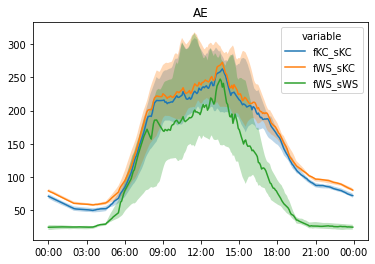

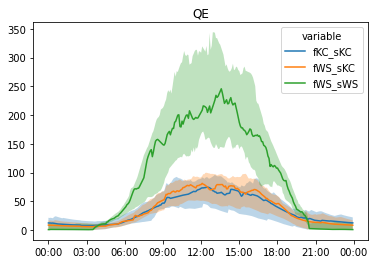

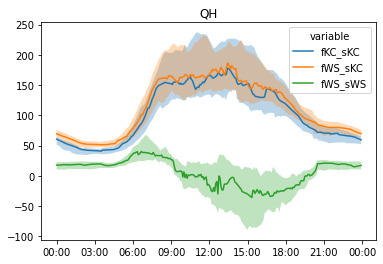

In [29]:

for var in ['AE','QE','QH']:
    fig,ax=sp.util.plot_day_clm(df_merge_x.loc['2012 7',var])
    _=ax.set_title(var)

## T2 issue

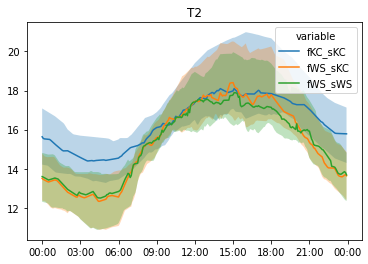

In [30]:
fig,ax=sp.util.plot_day_clm(df_merge_x.T2.loc['2012 7'])
_=ax.set_title('T2')

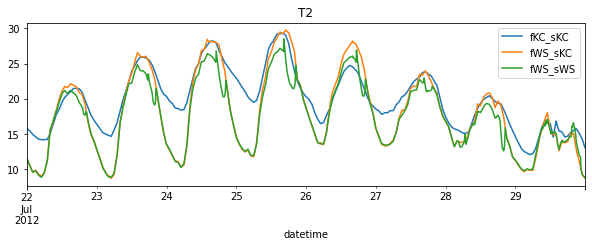

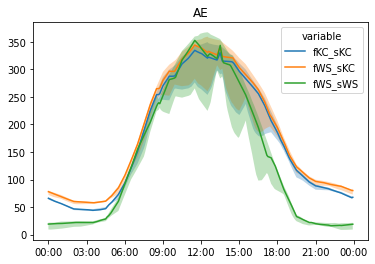

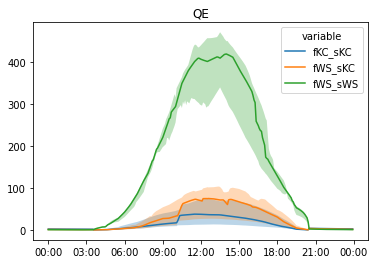

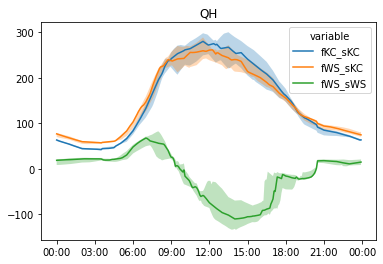

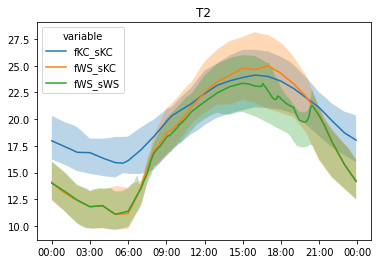

In [31]:
df_merge_x.loc[s:e,'T2'].plot(figsize=[10,3],title='T2')

for var in ['AE','QE','QH','T2']:
    fig,ax=sp.util.plot_day_clm(df_merge_x.loc[s:e,var])
    _=ax.set_title(var)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

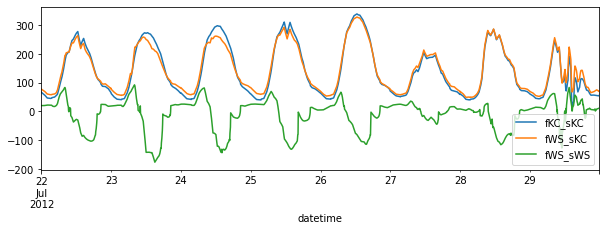

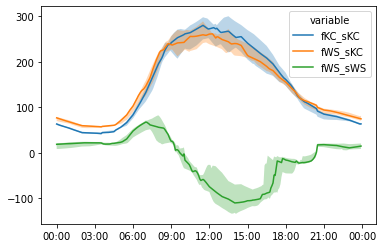

In [32]:
df_merge_x.loc[s:e,'QH'].plot(figsize=[10,3])
sp.util.plot_day_clm(df_merge_x.loc[s:e,'QH'])

<AxesSubplot:xlabel='datetime'>

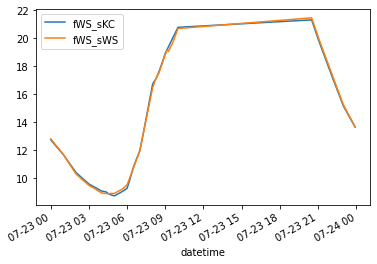

In [33]:
df_x=df_merge_x.loc[s:e,['QH','T2']].stack(0).iloc[:,1:].unstack(1).swaplevel(axis=1).sort_index(axis=1)
idx=df_x.loc['2012 7 23','QH'].query('fWS_sWS>0').index
df_x.loc['2012 7 23','T2'].loc[idx].plot()

<AxesSubplot:title={'center':'dif_T2'}, xlabel='flag_QH'>

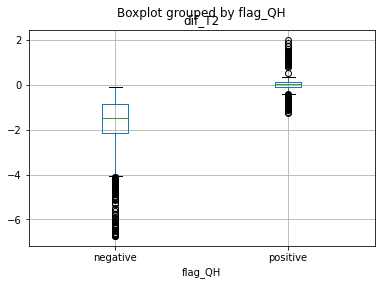

In [34]:
df_x=df_merge_x.loc[s:e,'QH']
flag_QH=df_x.fWS_sWS.where(df_x.fWS_sWS>0,False).astype(bool)
df_x=df_merge_x.loc[s:e,'T2'].diff(axis=1).assign(flag_QH=flag_QH.replace({True:'positive',False:'negative'}))
df_x.melt(id_vars='flag_QH',value_vars=['fWS_sWS'],value_name=r'dif_T2').boxplot(column=r'dif_T2',by='flag_QH')

<AxesSubplot:>

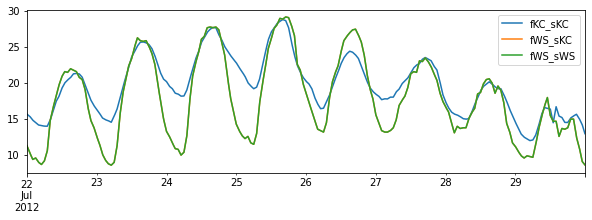

In [35]:
df_forcing_merge_x.loc[s:e,'Tair'].plot(figsize=[10,3])

In [36]:
df_T_RSL=df_output_merge_x.RSL.filter(like='T_').loc[s:e].stack().drop_prefix('T_').sort_index(axis=1,key=pd.to_numeric).unstack()


<AxesSubplot:xlabel='datetime'>

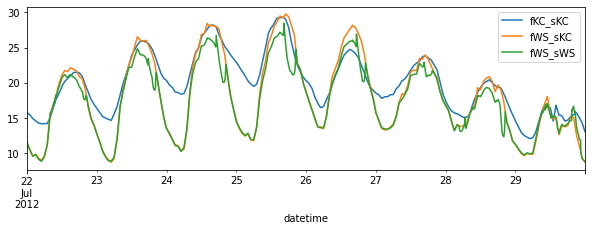

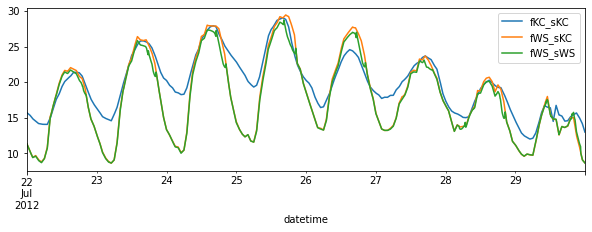

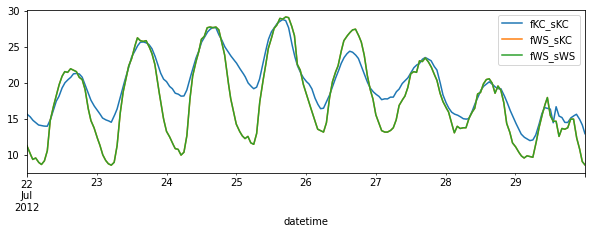

In [37]:
df_T_RSL.loc[:,'1'].plot(figsize=[10,3])
df_T_RSL.loc[:,'15'].plot(figsize=[10,3])
df_T_RSL.loc[:,'30'].plot(figsize=[10,3])

In [38]:
df_output_merge_x.RSL.stack().columns.to_list();

In [39]:
df_output_merge_x.RSL.flag_RSL

,fKC_sKC,fWS_sKC,fWS_sWS
datetime,,,
2011-01-01 00:05:00,1.0,1.0,0.0
2011-01-01 00:10:00,1.0,1.0,0.0
2011-01-01 00:15:00,1.0,1.0,0.0
2011-01-01 00:20:00,1.0,1.0,0.0
2011-01-01 00:25:00,1.0,1.0,0.0
...,...,...,...
2012-12-31 23:40:00,1.0,1.0,0.0
2012-12-31 23:45:00,1.0,1.0,0.0
2012-12-31 23:50:00,1.0,1.0,0.0
